# JSON World Bank DataSet Exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ Project by Shubham Tiwari 
+ April 1, 2019
****
The current project analyzes the World Bank dataset from a school quality improvement project in Ethiopia. The code attempts to convert JSON files ('data/world_bank_projects.json') into pandas dataframes, and answers the following questions: 
    
    + What are the top ten countries with the highest number of projects?
    + What are the top 10 major project themes?
    + How to handle data where project names are missing? 

Before I can begin to explore the data, I import the necessary packages: pandas, default dictionaries, seaborn and matplotlib 

In [1]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

The file is a json file, and would need to be read into a dataframe. 

In [2]:
file = 'data\world_bank_projects.json'
df = pd.read_json(file, 'r')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


I wanted to check the columns and contents, so created a transpose matrix of the first two rows as follows: 

In [3]:
analyse_df = df.loc[:1]
trans_df = analyse_df.transpose()
trans_df

,0,1
_id,{'$oid': '52b213b38594d8a2be17c780'},{'$oid': '52b213b38594d8a2be17c781'}
approvalfy,1999,2015
board_approval_month,November,November
boardapprovaldate,2013-11-12T00:00:00Z,2013-11-04T00:00:00Z
borrower,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,GOVERNMENT OF TUNISIA
closingdate,2018-07-07T00:00:00Z,NaN
country_namecode,Federal Democratic Republic of Ethiopia!$!ET,Republic of Tunisia!$!TN
countrycode,ET,TN
countryname,Federal Democratic Republic of Ethiopia,Republic of Tunisia
countryshortname,Ethiopia,Tunisia


To understand the number of projects per country, I set up a deafult dictionary counter, and iterated over the country name and counted the number of times its name appeared. This corresponded to the number of projects. 

In [4]:
project_num = defaultdict(int)
for country in df.countryname:
    project_num[country] += 1

I then created a dataframe using the pandas.DataFrame.from_dict() method, and sorted the dataframe by the number of projects in descending order. Here are the top 10 countries. 

In [5]:
pnum = pd.DataFrame.from_dict(project_num, orient='index', columns=['# Projects'])
sort_pnum = pnum.sort_values('# Projects', ascending=False)

In [6]:
top_10_projects = sort_pnum[:10]
top_10_projects

,# Projects
Republic of Indonesia,19
People's Republic of China,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Africa,11
Republic of Mozambique,11


Plotting the results of this dataframe in a simple barplot. 

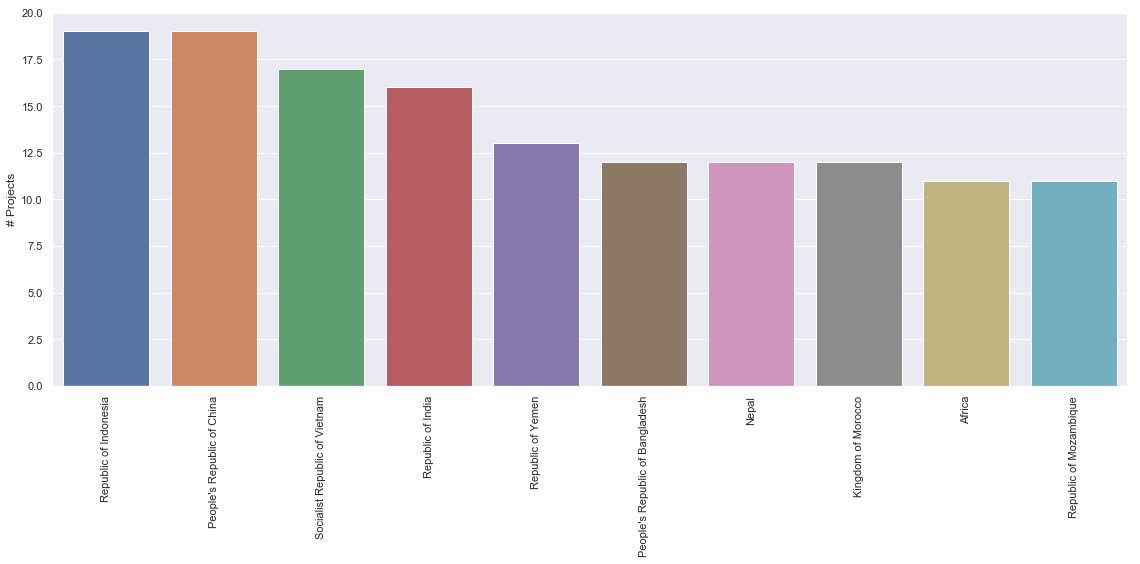

In [7]:
sns.set()
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_projects, x=top_10_projects.index, y='# Projects')
#plt.figure(1)
plt.xticks(rotation = 'vertical')
plt.ylim(0,20)

plt.tight_layout()
plt.show()

Next, I want to analyze the data that is in the themecode cell, and how the project themes are stored.

In [8]:
print(df.mjtheme_namecode.head())
print(df.mjtheme_namecode[0])
print(df.mjtheme_namecode[0][0])

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]
{'code': '8', 'name': 'Human development'}


In [9]:
print(type(df.mjtheme_namecode[0]))         # <class 'list'>
print(type(df.mjtheme_namecode[0][0]))      # <class 'dict'>

<class 'list'>
<class 'dict'>


Having a dictionary to change the theme codes to strings would be beneficial. Hence I initialize a dictionary with all the keys as theme codes, and values as themes.

In [10]:
code_name_relation = {'1':'Economic management', '2':'Public sector governance','3':'Rule of law','4':'Financial and private sector development','5':'Trade and integration','6':'Social protection and risk management','7':'Social dev/gender/inclusion','8':'Human development','9':'Urban development','10':'Rural development','11':'Environment and natural resources management'}

Next, I need to first go through each country, and collate the total number of themes in all the projects combined into a dataframe. Then I will go through each of these themes for each particular country, and store these codes and names in default dictionaries. 

I initialize a number of dictionaries to help me collect this information. The code_dict and name_dict will contain the countries as keys, and a default dictionary of number of codes, and a default dictionary of number of themes, respectively.

In [11]:
code_dict = {}
name_dict = {}

In [12]:
for country1 in sort_pnum.index:                          #going through each country saved in sort_pnum
    country_df = df[df['countryname'] == country1]        #filtering data by country and storing in country_df
    
    code_count = defaultdict(int)                         #number of times particular codes appear in that country
    name_count = defaultdict(int)                         #number of times particular themes appear in that country
    
    for list_themes in country_df['mjtheme_namecode']:    #iterating over the lists of dicts in country_df
        
        for dict_theme in list_themes:                    #iterating over the dictionaries in each list
            
            code = dict_theme['code']           
            code_count[code] += 1                         #increasing count by 1 for the corresponding codes
            name = dict_theme['name']
            
            if name == '':
                name = code_name_relation[code]           #missing project themes filled using code_name_relation dict
            name_count[name] += 1                         #increasing count by 1 for the corresponding themes
    
    code_dict[country1] = code_count                      #assigning code count dictionary to each country
    name_dict[country1] = name_count                      #assigning theme count dictionary to each country

There were some codes for which the theme name was blank or ' ', and it needed to be replaced. The easiest way was to correlate the code to the code_name_relation dictionary. 

The code_dict now contains a default dictionary of codes as keys and their corresponding counts as values, and the name_dict contains a default dictionary of theme names as keys and their corresponding counts as values, as follows:

In [13]:
print(code_dict.get('Republic of Indonesia'))
print(name_dict.get('Republic of Indonesia'))

defaultdict(<class 'int'>, {'11': 2, '4': 8, '2': 7, '3': 2, '7': 12, '8': 8, '10': 9, '6': 5, '5': 2, '9': 1})
defaultdict(<class 'int'>, {'Environment and natural resources management': 2, 'Financial and private sector development': 8, 'Public sector governance': 7, 'Rule of law': 2, 'Social dev/gender/inclusion': 12, 'Human development': 8, 'Rural development': 9, 'Social protection and risk management': 5, 'Trade and integration': 2, 'Urban development': 1})


Next, to calculate total number of countries and projects that have a particular theme, I made two dictionaries as given below. Then I iterated over code_dict keys (countries), and then over each code to add to this total code count. I did the same with name_dict and total name count.

In [14]:
total_code_count = defaultdict(int)
total_name_count = defaultdict(int)

In [15]:
for key in code_dict:
    for ccount in code_dict[key].keys():
        total_code_count[ccount] += code_dict[key][ccount]
        
for key in name_dict:
    for ncount in name_dict[key].keys():
        total_name_count[ncount] += name_dict[key][ncount]

In [16]:
print(total_code_count)
print(total_name_count)

defaultdict(<class 'int'>, {'11': 250, '4': 146, '2': 199, '3': 15, '7': 130, '8': 210, '10': 216, '6': 168, '5': 77, '9': 50, '1': 38})
defaultdict(<class 'int'>, {'Environment and natural resources management': 250, 'Financial and private sector development': 146, 'Public sector governance': 199, 'Rule of law': 15, 'Social dev/gender/inclusion': 130, 'Human development': 210, 'Rural development': 216, 'Social protection and risk management': 168, 'Trade and integration': 77, 'Urban development': 50, 'Economic management': 38})


Here is a visualization of the results in a pie chart. The exploding slices represent the top three project themes.

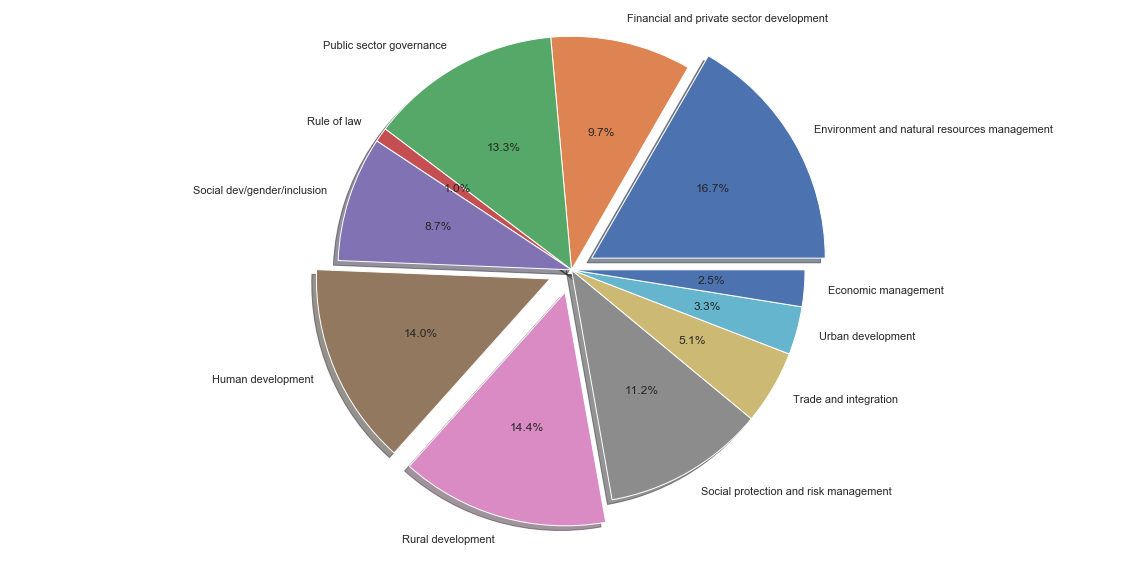

In [17]:
labels = total_name_count.keys()
sizes = total_name_count.values()
explode = (0.1,0,0,0,0,.1,.1,0,0,0,0)

plt.figure(figsize=[16,8])
plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

As a final check, to ensure that the count of code numbers matched the count of corresponding themes, I put in this statement:

In [18]:
for key in code_name_relation.keys():
    print(total_code_count[key] == total_name_count[code_name_relation[key]])

True
True
True
True
True
True
True
True
True
True
True
